In [313]:
import pandas as pd
import numpy as np
import time
#Importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample 


from sklearn.compose import ColumnTransformer  # Import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import required preprocessors

# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

# Evaluation metric imports
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    roc_auc_score, 
    roc_curve, 
    log_loss)

In [314]:
df=pd.read_csv("C://Users//OMEN//Downloads//Base.csv//Base.csv")

In [315]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [316]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [318]:
df.duplicated().sum()

0

In [319]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,...,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,...,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,...,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,...,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,...,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,...,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,...,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,...,85.899143,1.000000,2.000000,0.0,7.000000


In [320]:
df.fraud_bool.value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

In [321]:
df = df.drop([
    "days_since_request",
    "intended_balcon_amount",
    "bank_branch_count_8w",
    "date_of_birth_distinct_emails_4w",
    "email_is_free",
    "phone_home_valid",
    "bank_months_count",
    "has_other_cards",
    "device_os",
    "session_length_in_minutes",
    "keep_alive_session",
    "device_distinct_emails_8w",
    "month"
], axis=1)

In [322]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'payment_type', 'zip_count_4w', 'velocity_6h',
       'velocity_24h', 'velocity_4w', 'employment_status', 'credit_risk_score',
       'housing_status', 'phone_mobile_valid', 'proposed_credit_limit',
       'foreign_request', 'source', 'device_fraud_count'],
      dtype='object')

<Axes: >

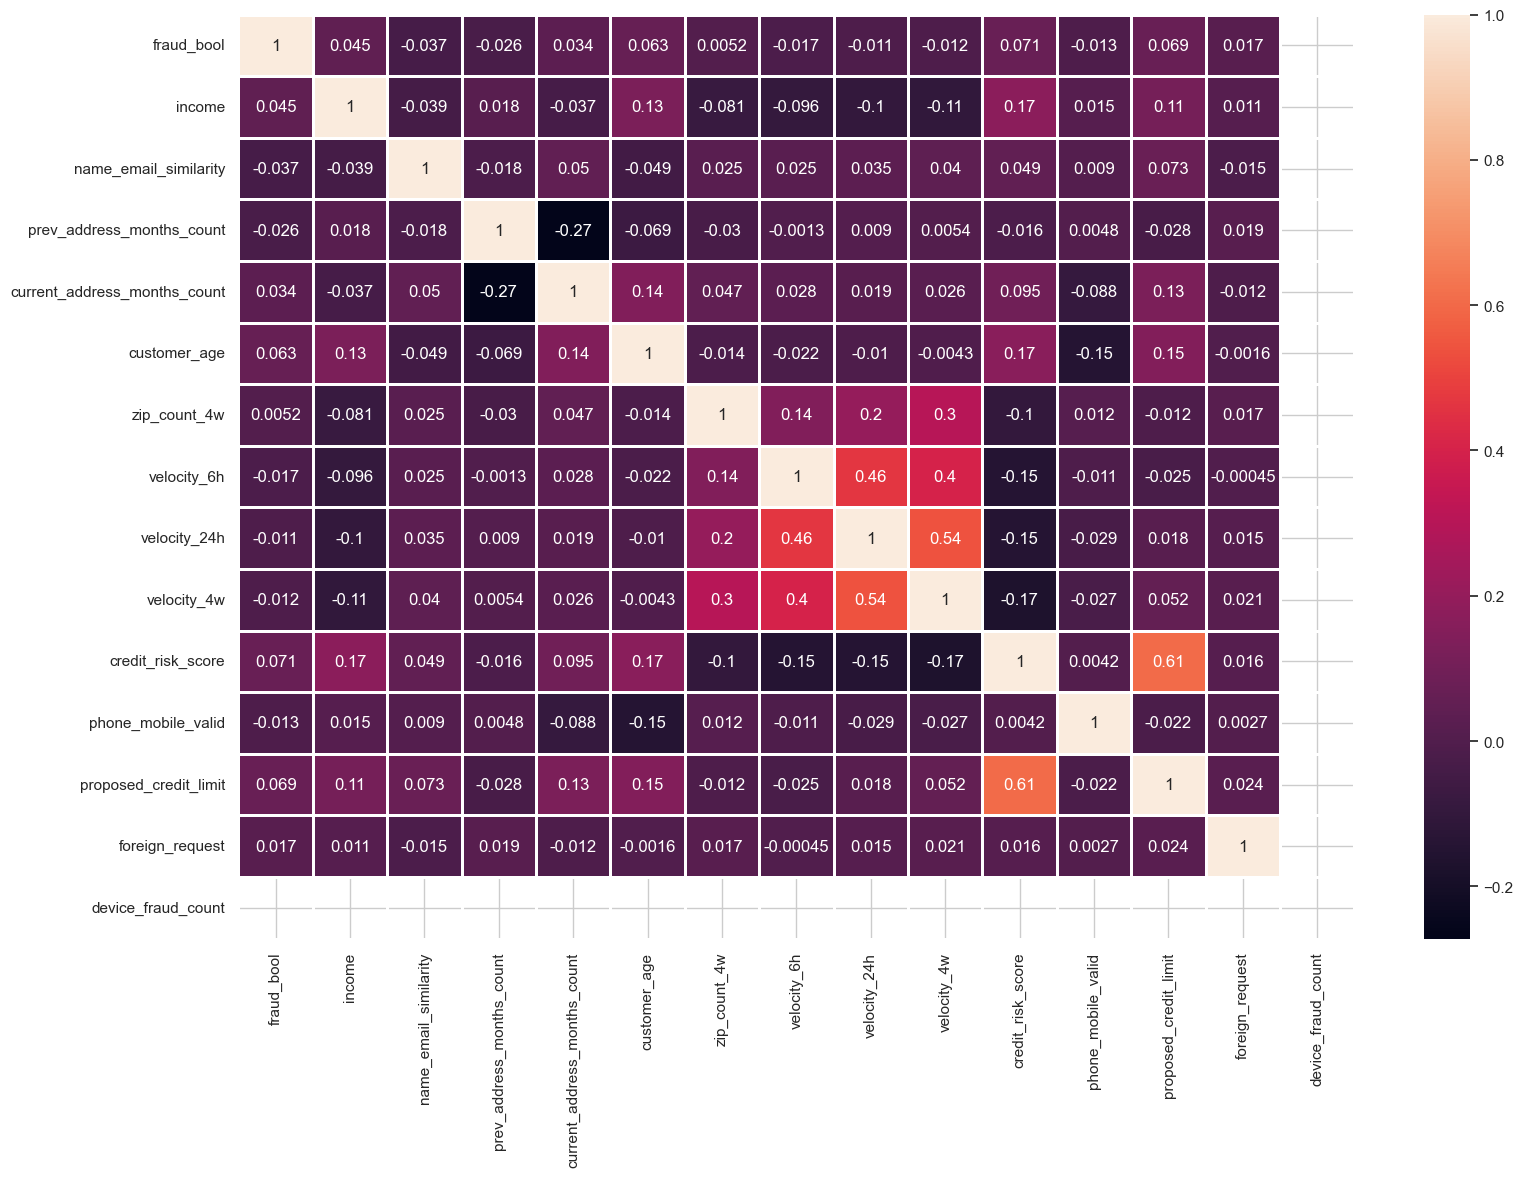

In [323]:
plt.figure(figsize=(18,12))
corr=df.corr(numeric_only=True)
sns.heatmap(data=corr,annot=True,fmt=".2g",linewidths=1)

fraud_bool
0    988971
1     11029
Name: count, dtype: int64
fraud_bool
0    0.988971
1    0.011029
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

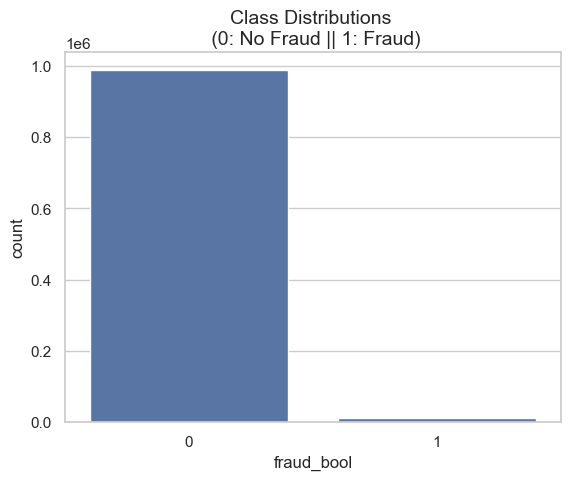

In [324]:
print(df.fraud_bool.value_counts(normalize=False))
print(df.fraud_bool.value_counts(normalize=True))
sns.countplot(x='fraud_bool', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [325]:
cat_df = df.select_dtypes(include = ['object'])

In [326]:
for col in cat_df.columns:
    print(f"Column: {col}")
    print(f"Unique Values: {cat_df[col].unique()}")
    print("Value Counts:")
    print(cat_df[col].value_counts(dropna=False))
    print("-" * 40)  

Column: payment_type
Unique Values: ['AA' 'AD' 'AB' 'AC' 'AE']
Value Counts:
payment_type
AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: count, dtype: int64
----------------------------------------
Column: employment_status
Unique Values: ['CB' 'CA' 'CC' 'CF' 'CD' 'CE' 'CG']
Value Counts:
employment_status
CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: count, dtype: int64
----------------------------------------
Column: housing_status
Unique Values: ['BC' 'BE' 'BD' 'BA' 'BB' 'BF' 'BG']
Value Counts:
housing_status
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: count, dtype: int64
----------------------------------------
Column: source
Unique Values: ['INTERNET' 'TELEAPP']
Value Counts:
source
INTERNET    992952
TELEAPP       7048
Name: count, dtype: int64
----------------------------------------


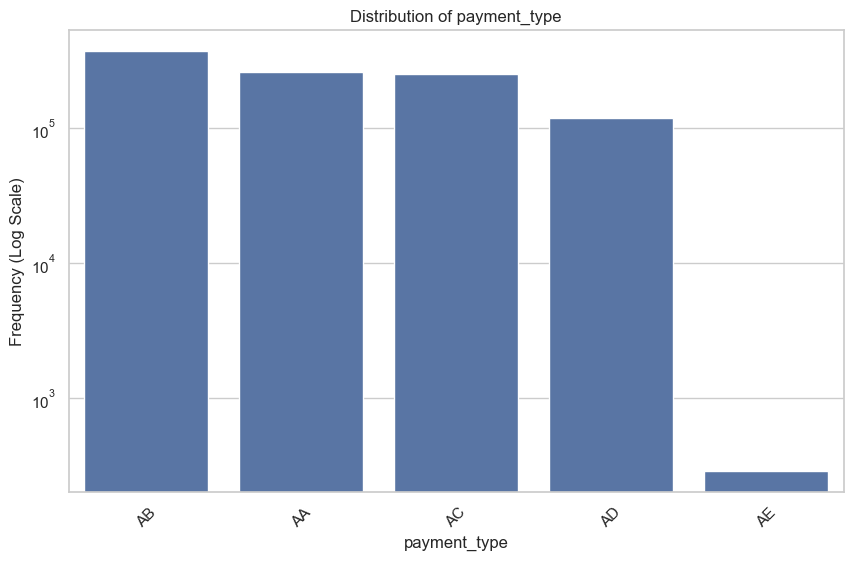

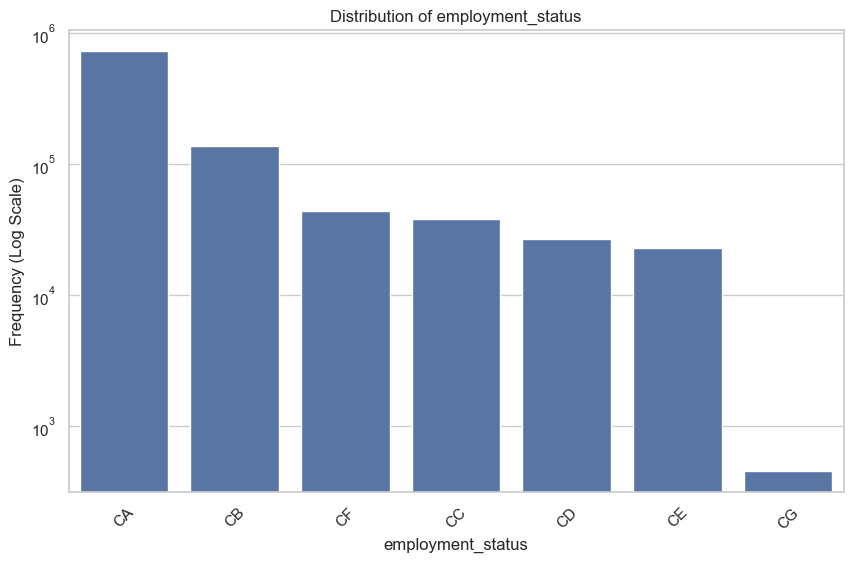

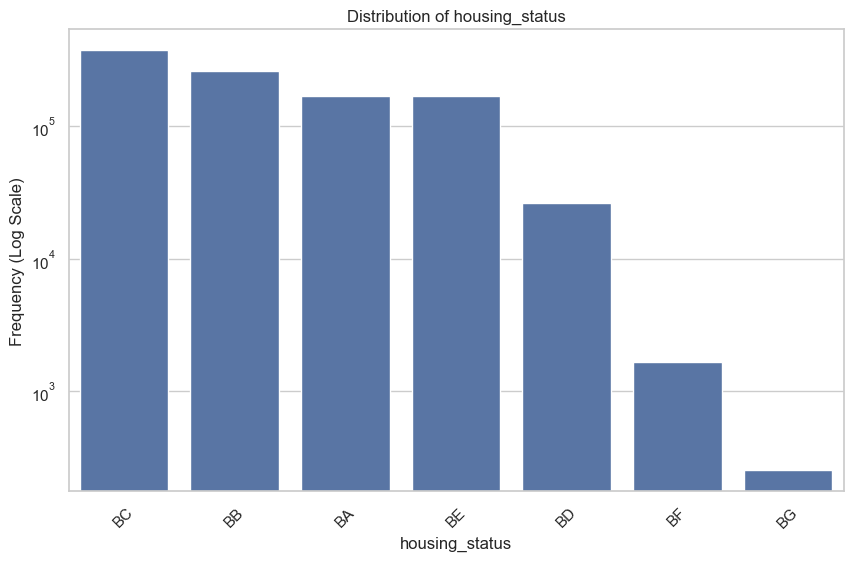

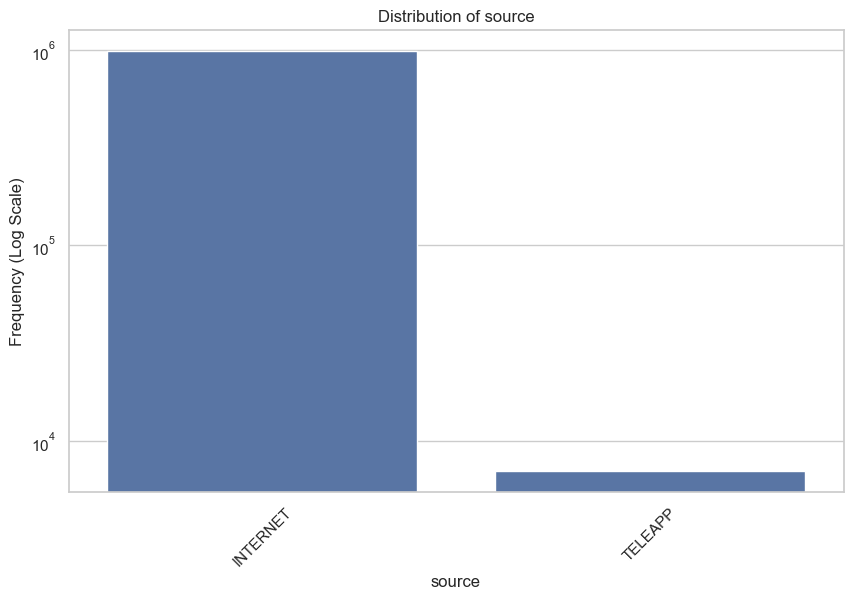

In [327]:
sns.set(style="whitegrid")

# Iterate through each column in the categorical DataFrame
for col in cat_df.columns:
    # Set up the figure for each chart
    plt.figure(figsize=(10, 6))
    
    # Plot the value counts as a bar chart
    sns.countplot(data=cat_df, x=col, order=cat_df[col].value_counts().index)
    
    # Add title and labels
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency (Log Scale)')
    plt.yscale('log') 
    # Rotate x-axis labels if they are too long
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()

In [328]:
num_df = df.select_dtypes(exclude = ['object'])

In [329]:
num_df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'credit_risk_score', 'phone_mobile_valid',
       'proposed_credit_limit', 'foreign_request', 'device_fraud_count'],
      dtype='object')

In [330]:
num_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,...,credit_risk_score,phone_mobile_valid,proposed_credit_limit,foreign_request,device_fraud_count
0,0,0.3,0.986506,-1,25,...,163,1,1500.0,0,0
1,0,0.8,0.617426,-1,89,...,154,1,1500.0,0,0
2,0,0.8,0.996707,9,14,...,89,1,200.0,0,0
3,0,0.6,0.475100,11,14,...,90,1,200.0,0,0
4,0,0.9,0.842307,-1,29,...,91,1,200.0,0,0


<Figure size 1000x600 with 0 Axes>

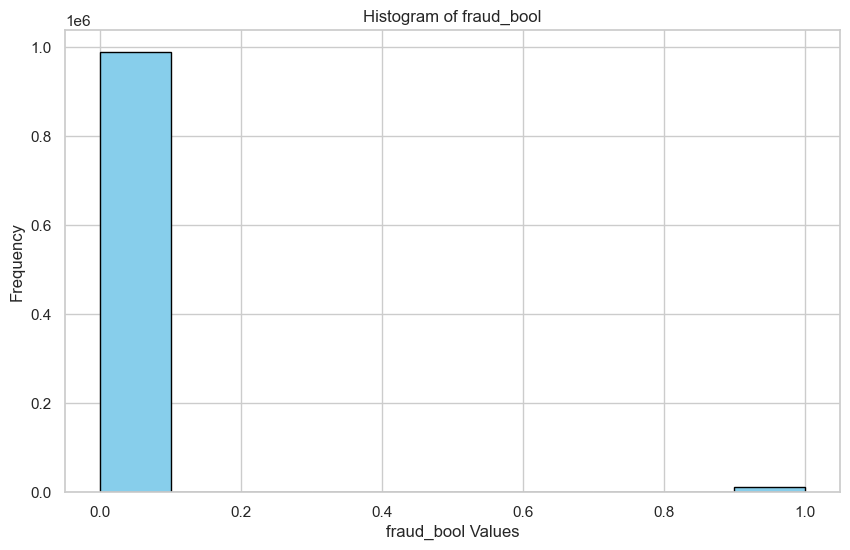

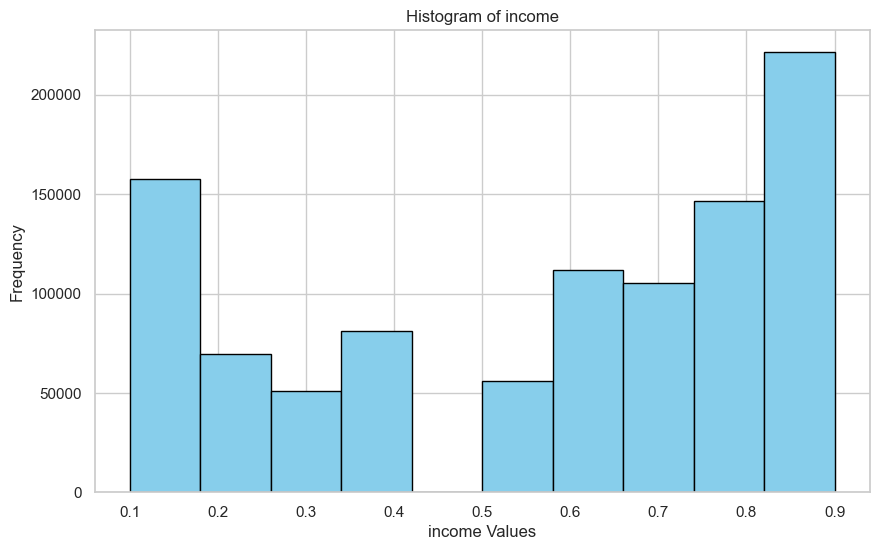

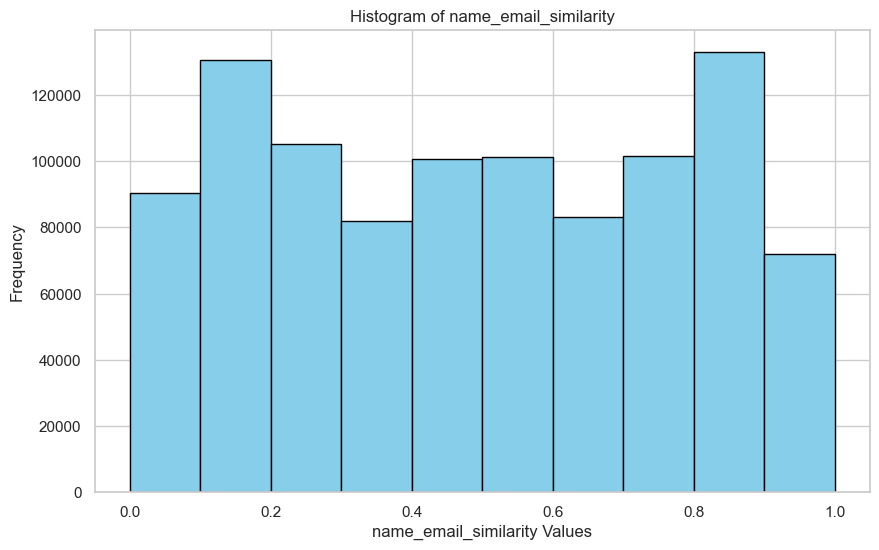

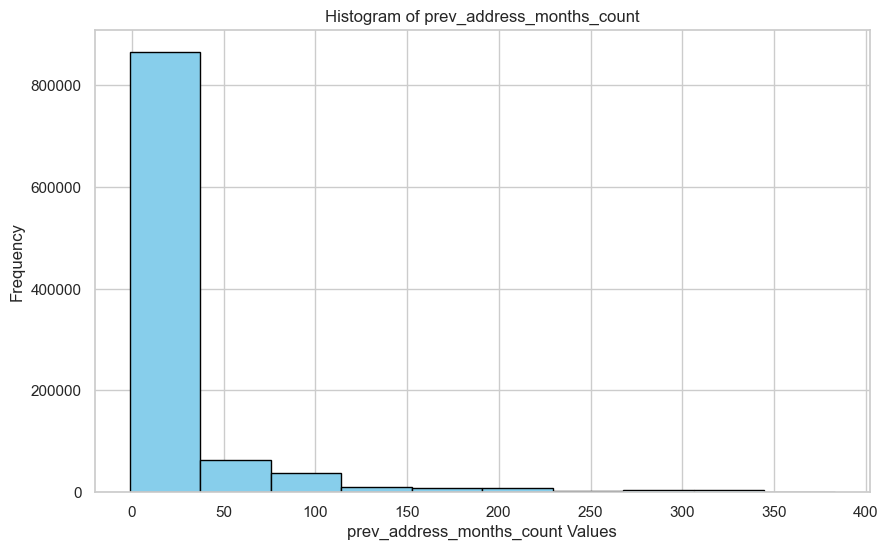

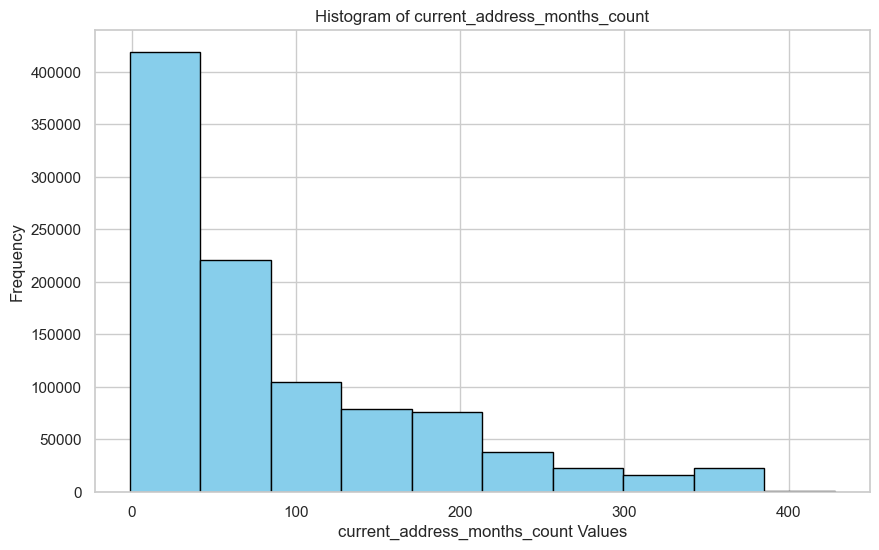

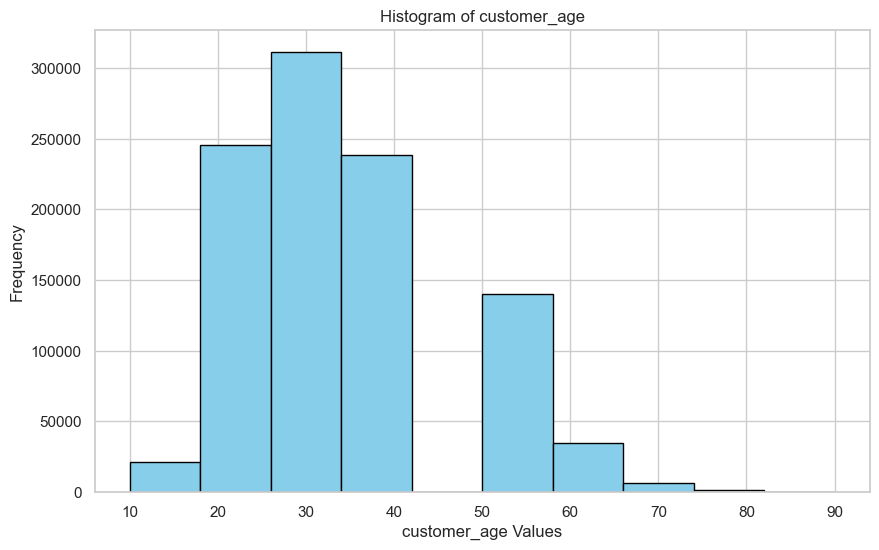

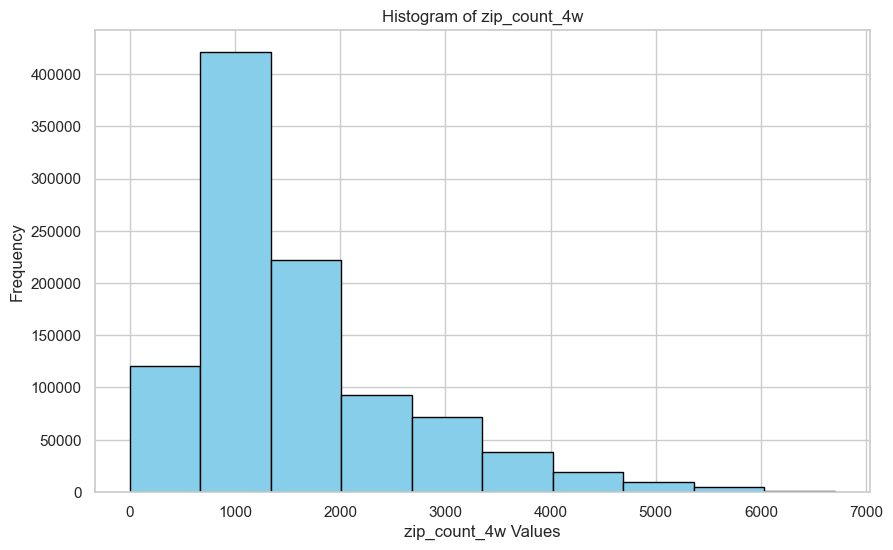

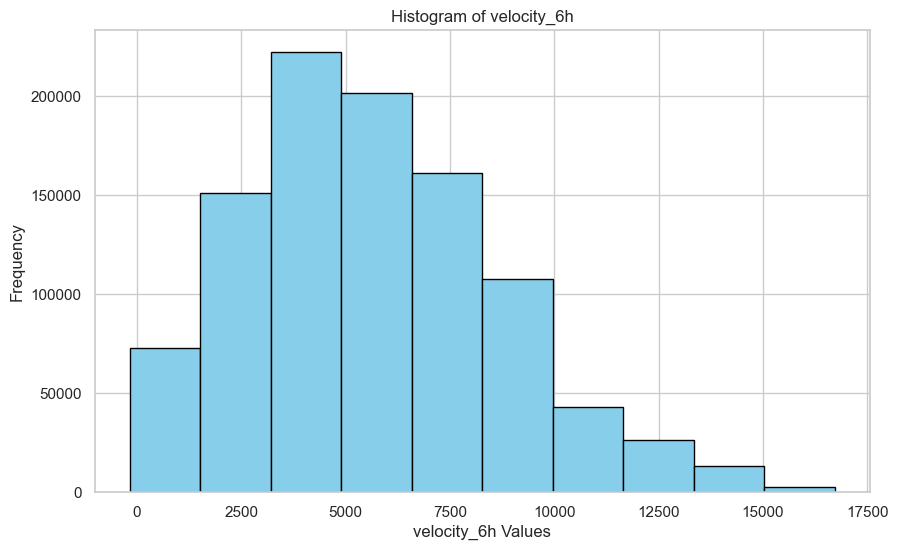

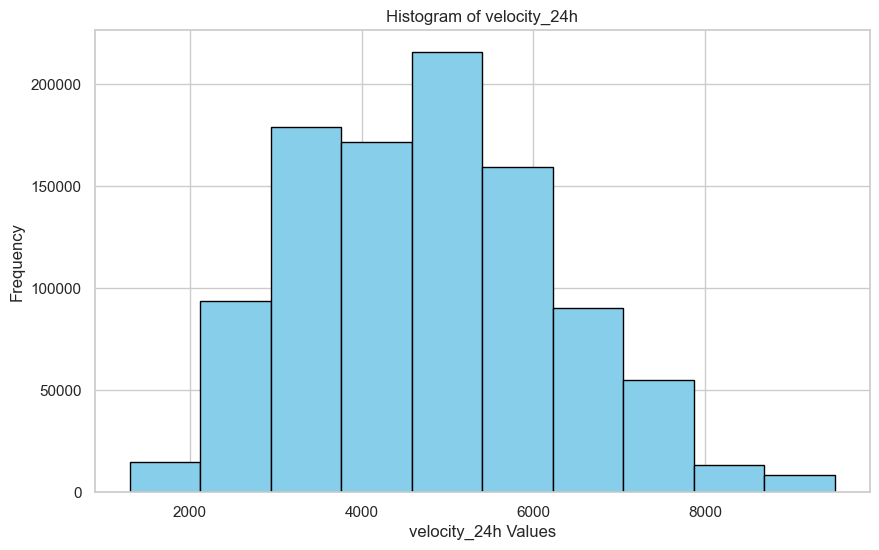

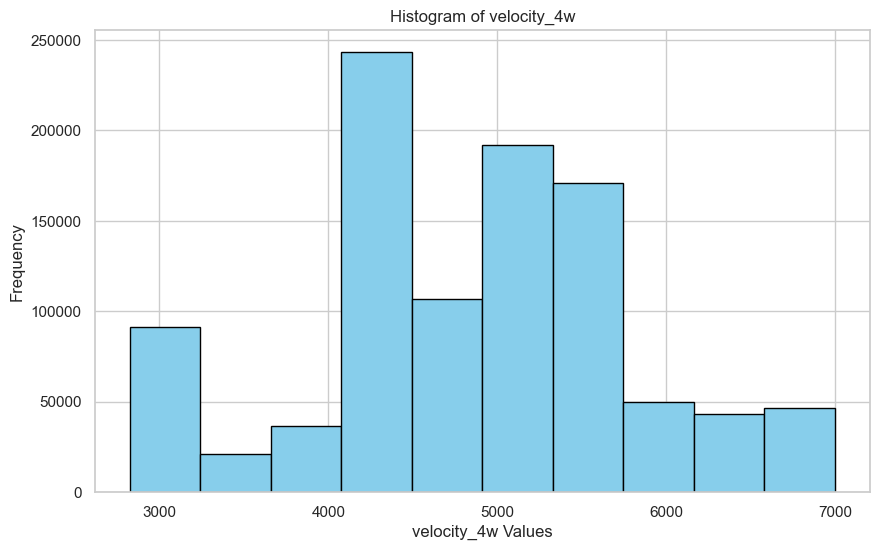

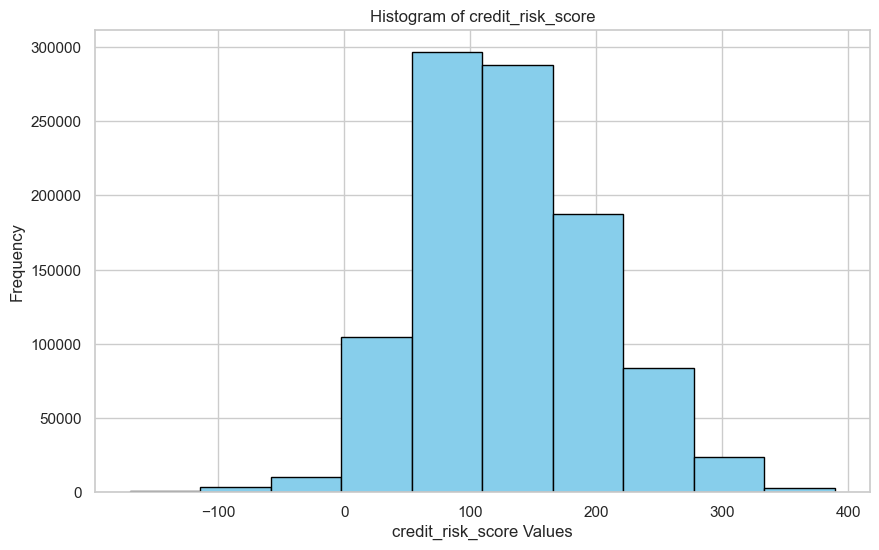

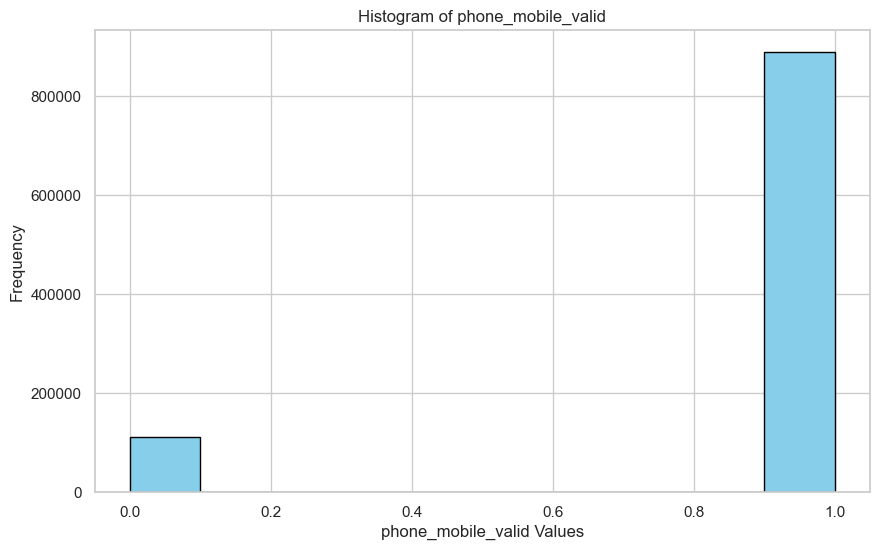

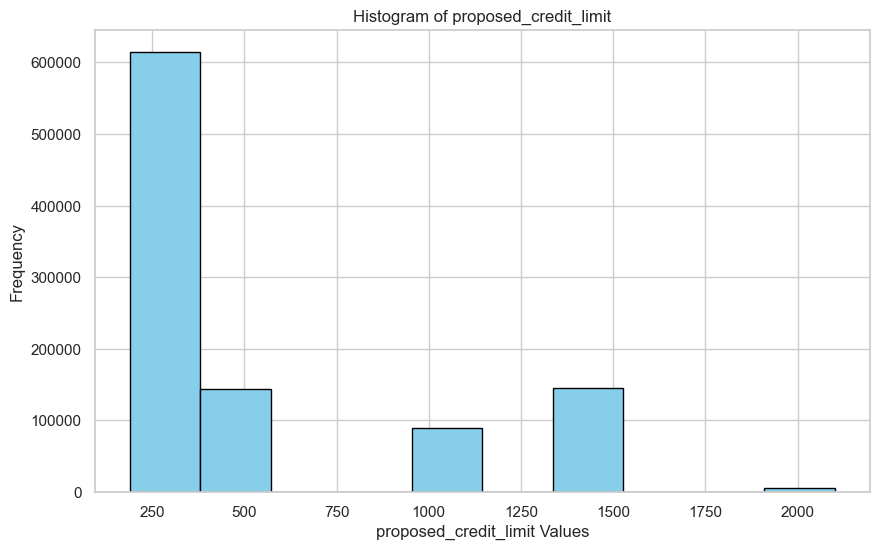

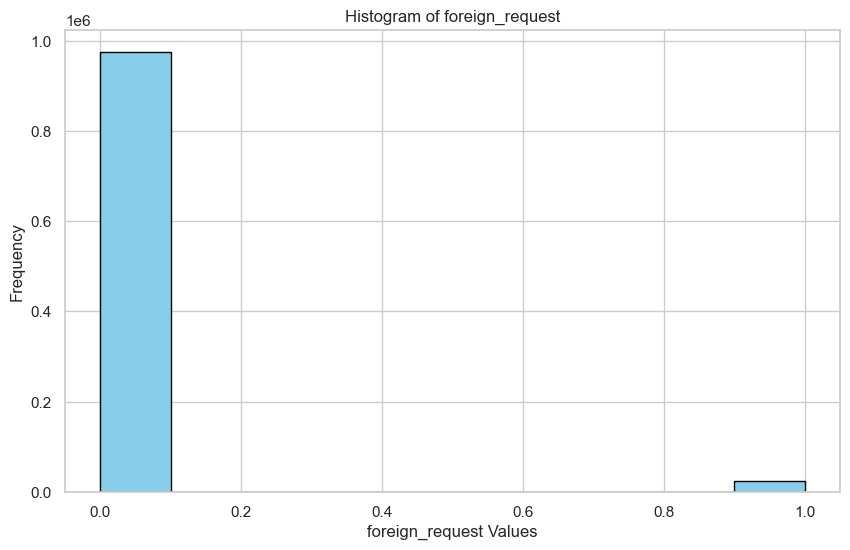

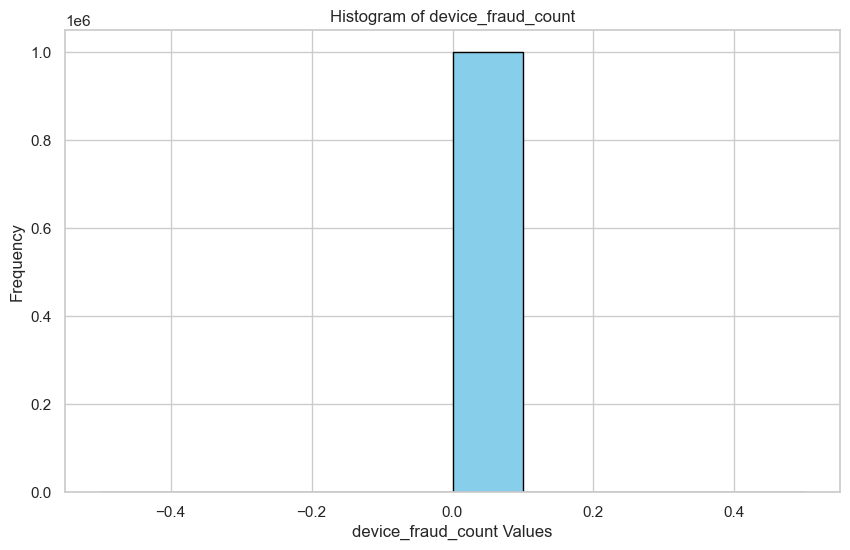

In [331]:
plt.figure(figsize=(10, 6))


for col in num_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(num_df[col], color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(f"{col} Values")
    plt.ylabel("Frequency")
    plt.show()

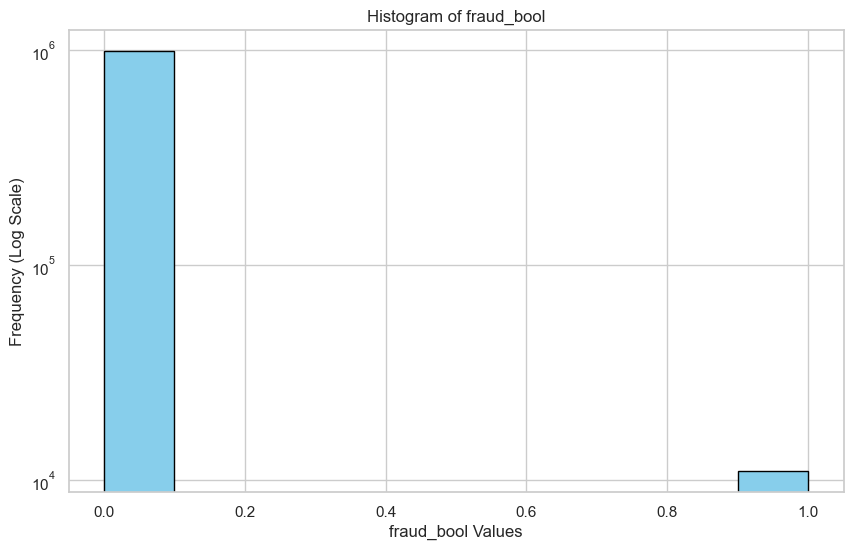

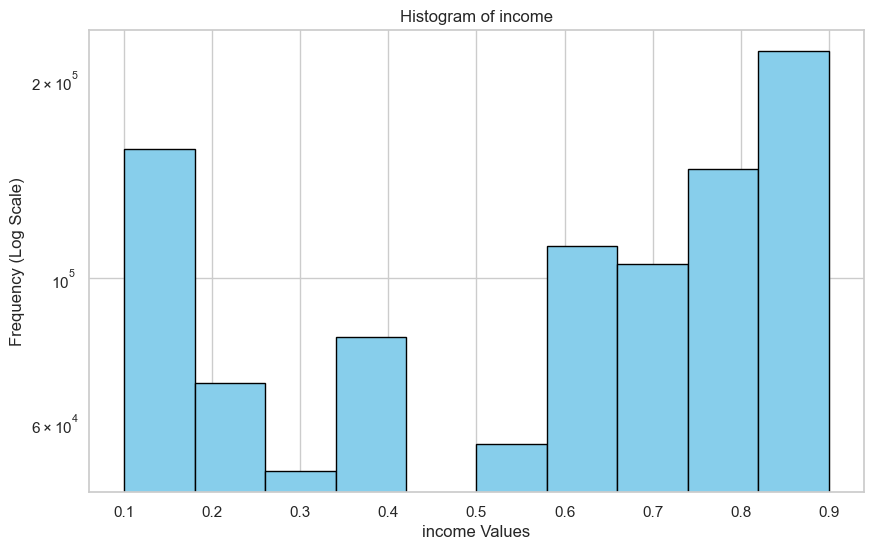

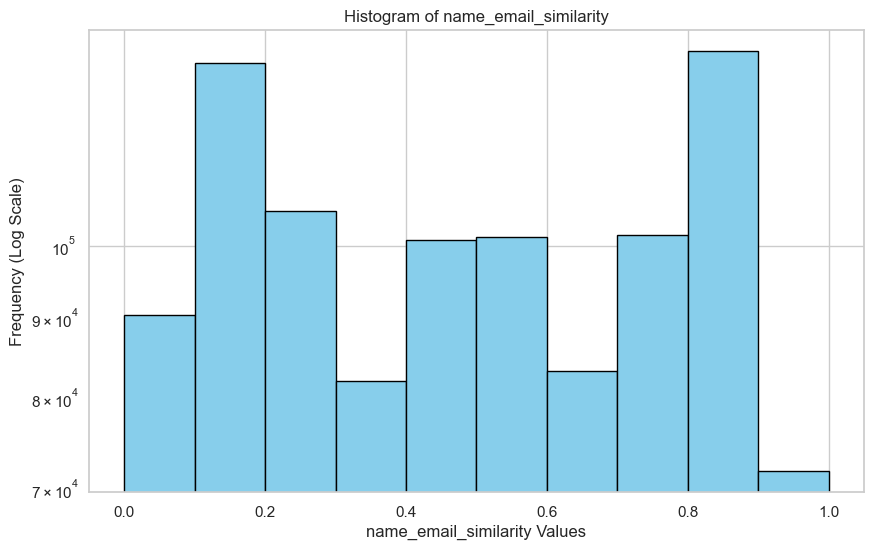

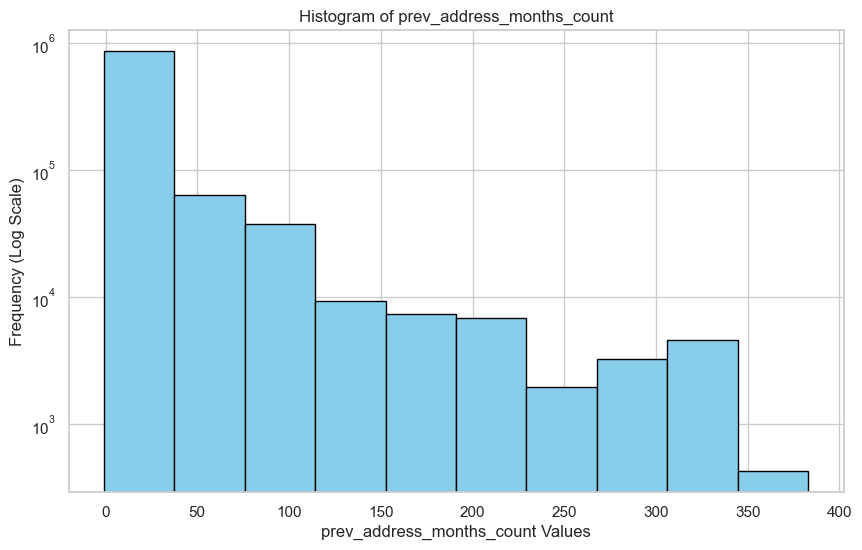

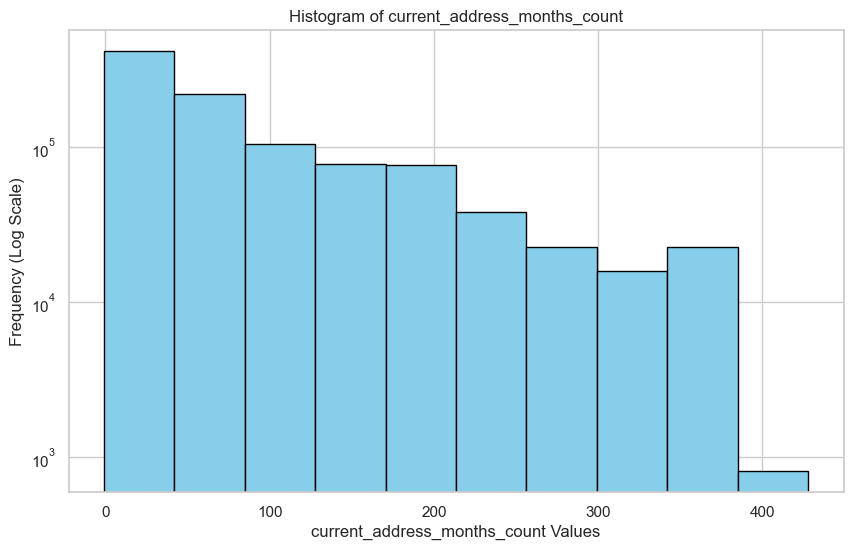

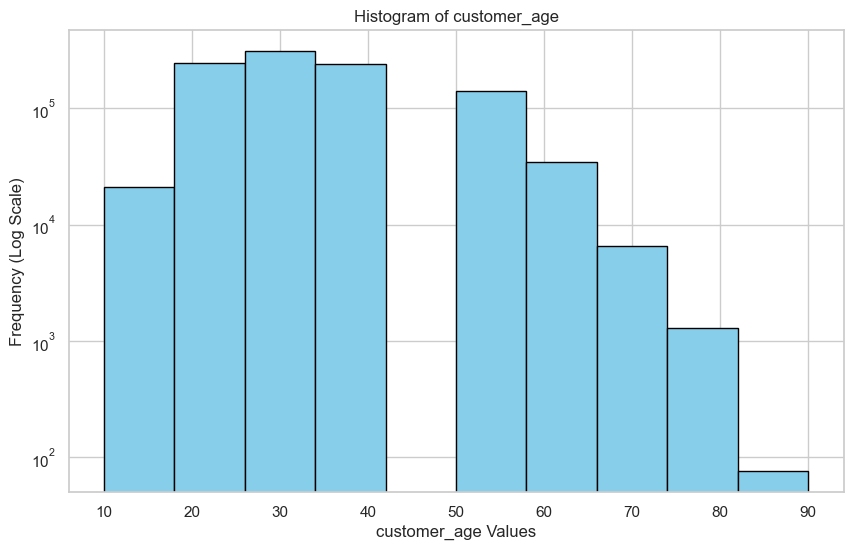

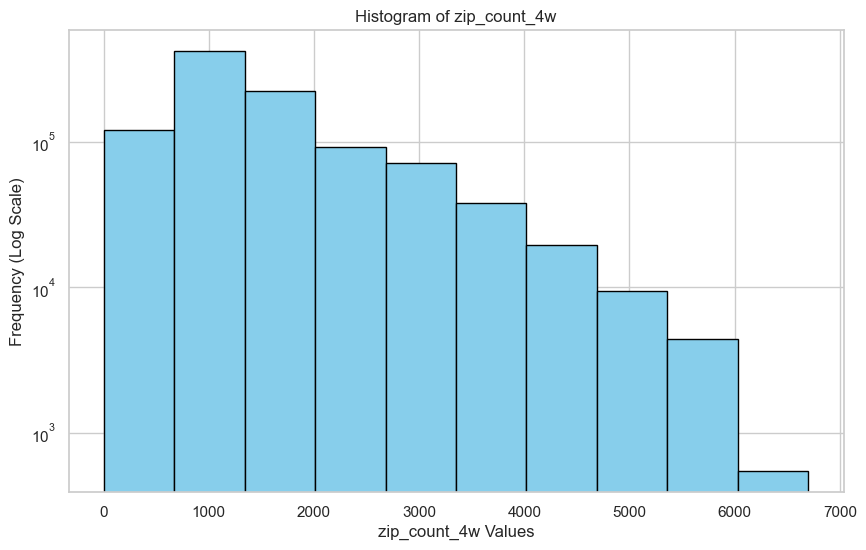

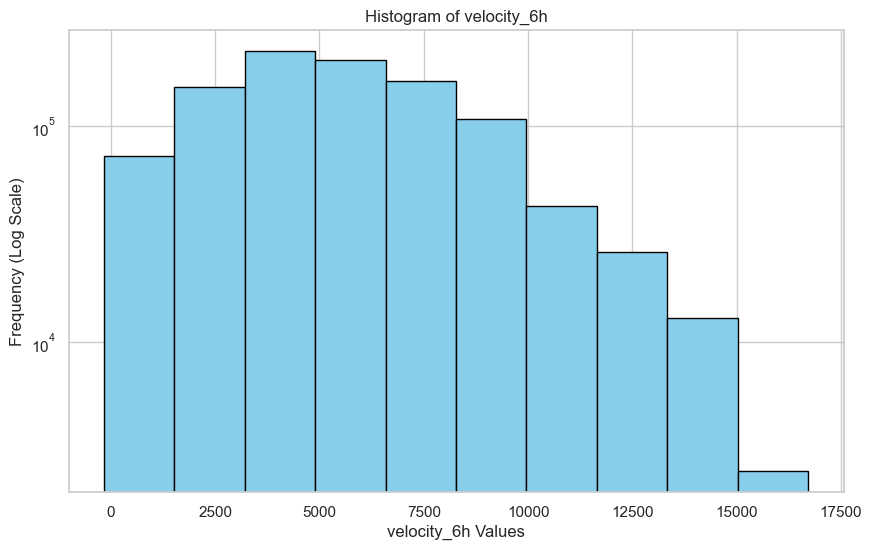

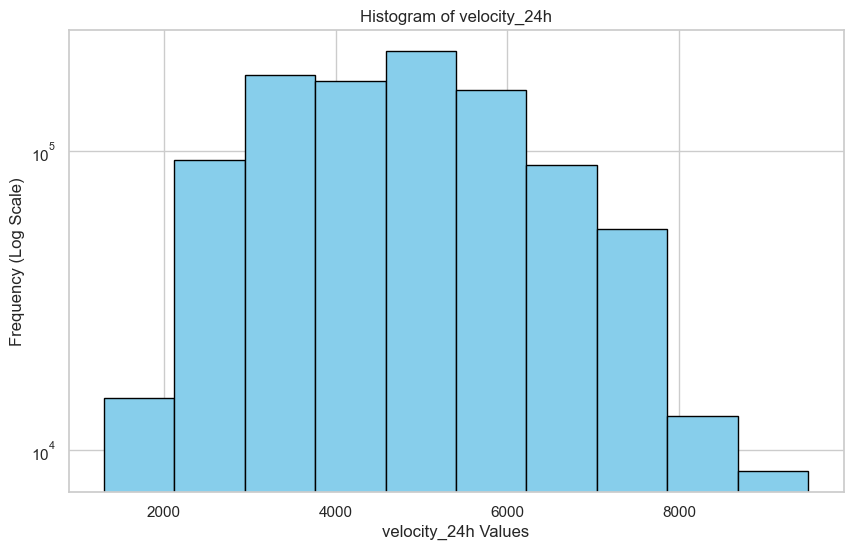

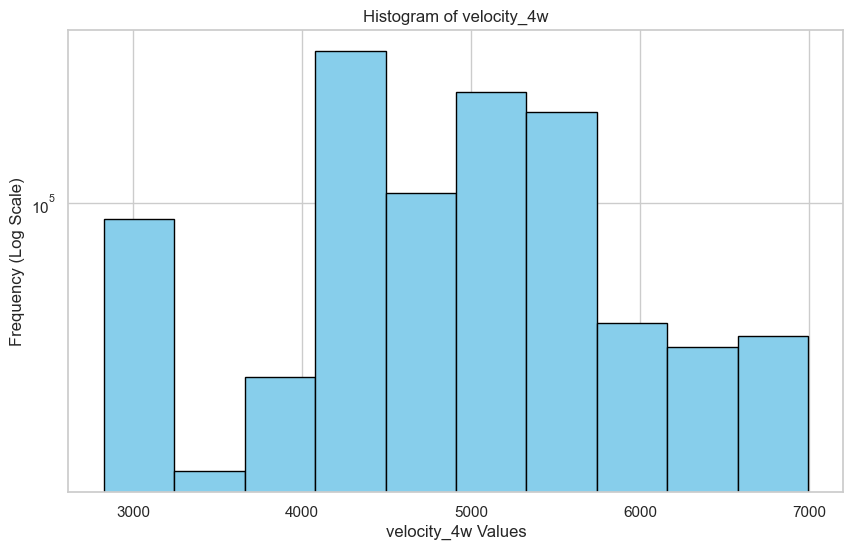

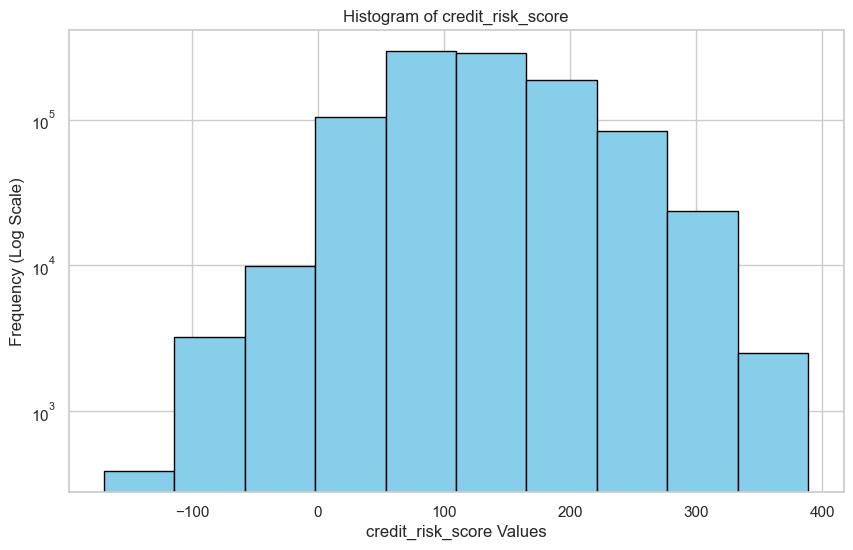

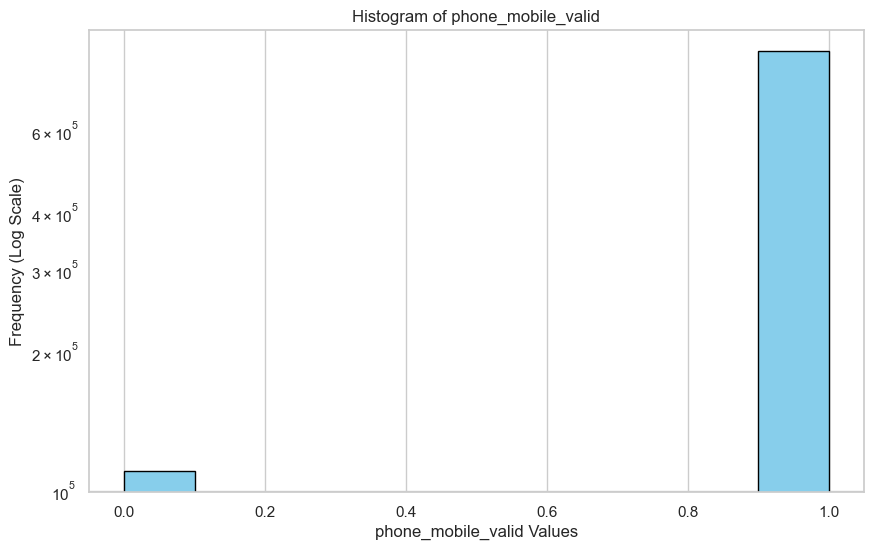

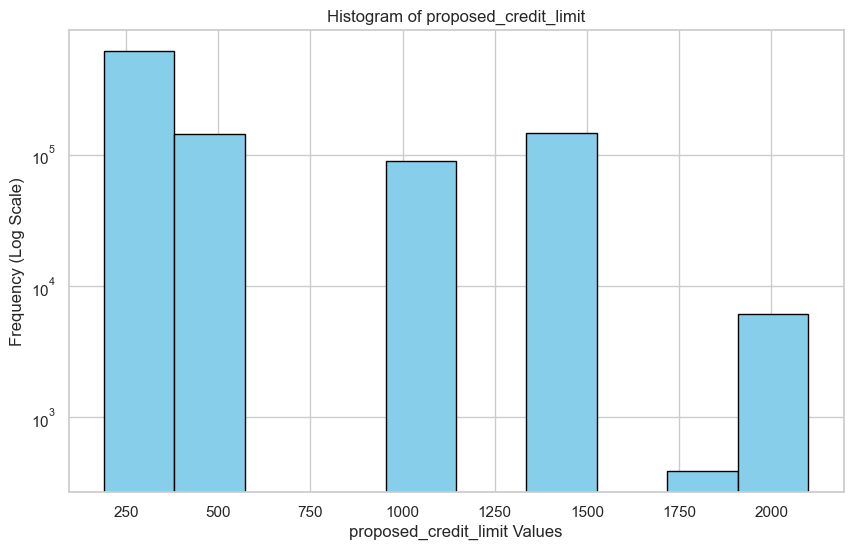

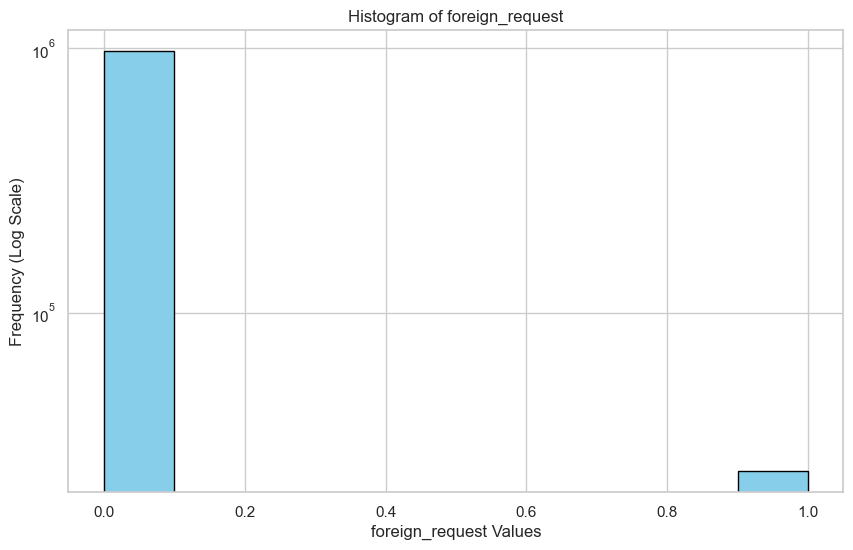

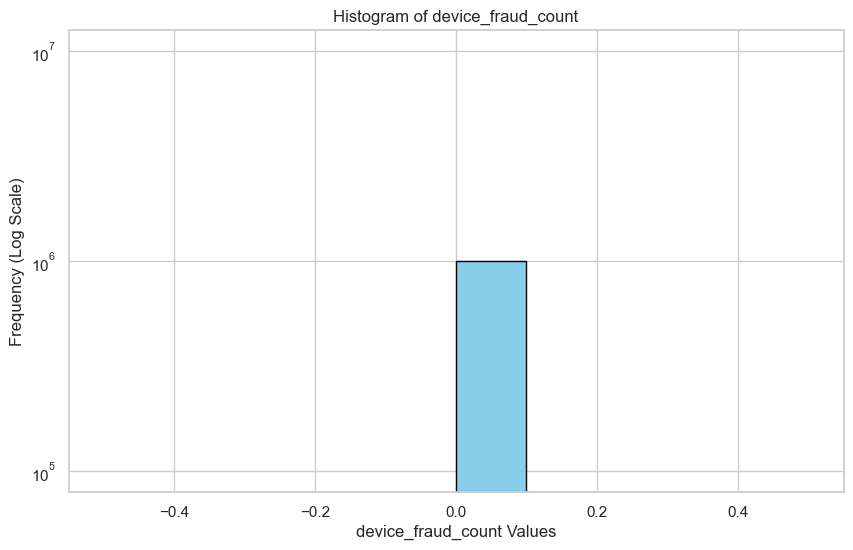

In [332]:
for col in num_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(num_df[col], color='skyblue', edgecolor='black')
    plt.yscale('log')
    plt.title(f"Histogram of {col}")
    plt.xlabel(f"{col} Values")
    plt.ylabel('Frequency (Log Scale)')
    plt.show()

In [333]:
# Separate the target variable if needed
target_variable = df['fraud_bool']
features = df.drop(columns=["fraud_bool"])


In [334]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'payment_type', 'zip_count_4w', 'velocity_6h',
       'velocity_24h', 'velocity_4w', 'employment_status', 'credit_risk_score',
       'housing_status', 'phone_mobile_valid', 'proposed_credit_limit',
       'foreign_request', 'source', 'device_fraud_count'],
      dtype='object')

In [335]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [336]:
# categorical_features.columns

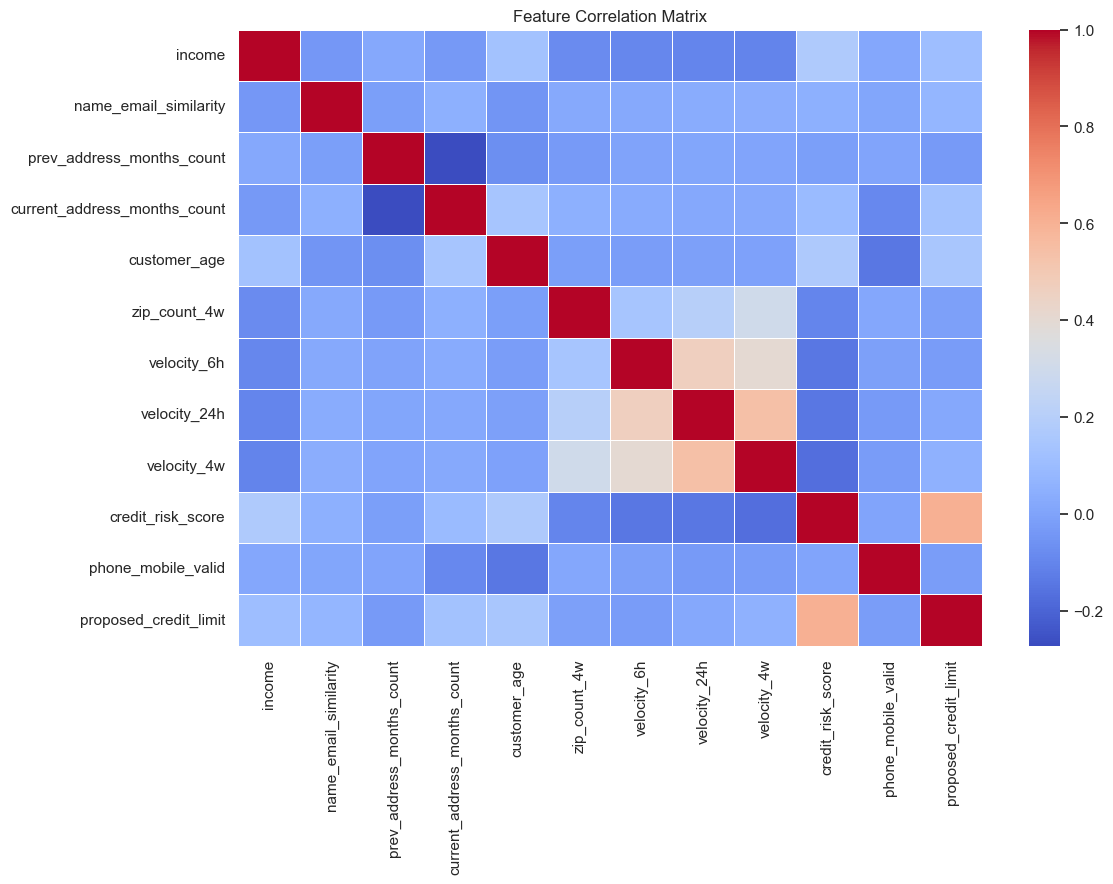

Selected Features after Variance Thresholding and Correlation Filtering:
 ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'credit_risk_score', 'phone_mobile_valid', 'proposed_credit_limit']


In [337]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.05):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data.columns[selector.get_support()]
    
numeric_features = df.select_dtypes(include=['int64', 'float64'])
categorical_features = df.select_dtypes(include=['object', 'category'])
selected_features = variance_threshold_selector(numeric_features)

# Filter dataset with selected features
df_filtered = df[selected_features]

# 2. Correlation Matrix Analysis
correlation_matrix = df_filtered.corr()

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Removing highly correlated features (Threshold: 0.85)
corr_threshold = 0.85
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Final selected features
final_features = [col for col in df_filtered.columns if col not in correlated_features]

print("Selected Features after Variance Thresholding and Correlation Filtering:\n", final_features)


# Data Preprocessing

In [339]:

df_filtered = pd.concat([df_filtered, target_variable], axis=1)
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   income                        1000000 non-null  float64
 1   name_email_similarity         1000000 non-null  float64
 2   prev_address_months_count     1000000 non-null  int64  
 3   current_address_months_count  1000000 non-null  int64  
 4   customer_age                  1000000 non-null  int64  
 5   zip_count_4w                  1000000 non-null  int64  
 6   velocity_6h                   1000000 non-null  float64
 7   velocity_24h                  1000000 non-null  float64
 8   velocity_4w                   1000000 non-null  float64
 9   credit_risk_score             1000000 non-null  int64  
 10  phone_mobile_valid            1000000 non-null  int64  
 11  proposed_credit_limit         1000000 non-null  float64
 12  fraud_bool                   

In [340]:

df_filtered = pd.concat([df_filtered, categorical_features], axis=1)

In [341]:
df_fraud = df_filtered[df_filtered['fraud_bool'] == 1]
df_non_fraud = df_filtered[df_filtered['fraud_bool'] == 0]

In [342]:
df_non_fraud_downsampled = resample(df_non_fraud,
                                    replace=False,  # sample without replacement (non duplicates)
                                    n_samples=len(df_fraud),  # to match minority class
                                    random_state=42)             # for reproducibility

In [343]:
# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_fraud, df_non_fraud_downsampled])

In [344]:
df_non_fraud_downsampled.shape

(11029, 17)

In [345]:
df_non_fraud_downsampled.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,credit_risk_score,phone_mobile_valid,proposed_credit_limit,fraud_bool,payment_type,employment_status,housing_status,source
518794,0.8,0.735925,104,10,30,2062,1664.244920,3839.597315,4962.294552,91,1,200.0,0,AB,CA,BB,INTERNET
567631,0.9,0.313330,-1,30,30,1498,7375.041588,5404.494837,5072.988221,73,1,200.0,0,AB,CA,BC,INTERNET
269688,0.1,0.129044,-1,238,20,1019,11545.580597,7142.127074,5767.843283,47,1,200.0,0,AB,CA,BE,INTERNET
375838,0.9,0.071233,-1,65,30,1140,2928.116344,4557.353802,5638.310004,77,1,200.0,0,AD,CB,BC,INTERNET
558695,0.1,0.920019,62,13,30,1103,3721.656126,2703.314684,4359.495202,185,0,1500.0,0,AA,CA,BB,INTERNET


In [346]:
df_balanced.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,credit_risk_score,phone_mobile_valid,proposed_credit_limit,fraud_bool,payment_type,employment_status,housing_status,source
43,0.9,0.570800,-1,157,60,4079,8139.265753,4312.230612,6341.431598,131,1,1500.0,1,AA,CA,BA,INTERNET
140,0.1,0.993219,-1,67,20,1192,8330.727428,6708.346918,6709.436651,79,1,1500.0,1,AA,CA,BB,INTERNET
284,0.8,0.794351,-1,376,60,815,9747.407396,6902.019628,6467.154127,196,0,1500.0,1,AA,CC,BA,INTERNET
314,0.7,0.090000,-1,58,50,4011,8036.901841,5794.624929,6333.335164,177,1,1500.0,1,AD,CA,BA,INTERNET
561,0.9,0.998248,31,45,30,525,6883.814598,3655.042385,4327.215795,273,1,2000.0,1,AA,CA,BA,INTERNET


In [347]:
df_balanced.shape

(22058, 17)

In [348]:
# Shuffeling the values of dataframe and dropping index 
# Why - Shuffling ensures that the data is randomized and no inherent order (such as sorted data) biases the model's learning process.
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [349]:
df_balanced.shape

(22058, 17)

In [350]:
df_balanced.columns

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'zip_count_4w',
       'velocity_6h', 'velocity_24h', 'velocity_4w', 'credit_risk_score',
       'phone_mobile_valid', 'proposed_credit_limit', 'fraud_bool',
       'payment_type', 'employment_status', 'housing_status', 'source'],
      dtype='object')

In [351]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22058 entries, 0 to 22057
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   income                        22058 non-null  float64
 1   name_email_similarity         22058 non-null  float64
 2   prev_address_months_count     22058 non-null  int64  
 3   current_address_months_count  22058 non-null  int64  
 4   customer_age                  22058 non-null  int64  
 5   zip_count_4w                  22058 non-null  int64  
 6   velocity_6h                   22058 non-null  float64
 7   velocity_24h                  22058 non-null  float64
 8   velocity_4w                   22058 non-null  float64
 9   credit_risk_score             22058 non-null  int64  
 10  phone_mobile_valid            22058 non-null  int64  
 11  proposed_credit_limit         22058 non-null  float64
 12  fraud_bool                    22058 non-null  int64  
 13  p

In [356]:


print(type(df_balanced))

<class 'pandas.core.frame.DataFrame'>


In [360]:
# Define categorical and numerical features
categorical_columns = ['payment_type', 'employment_status', 'housing_status', 'source']
numerical_columns = df_balanced.drop(columns=['fraud_bool' ] + categorical_columns).columns.tolist()

In [374]:
df_balanced.columns

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'zip_count_4w',
       'velocity_6h', 'velocity_24h', 'velocity_4w', 'credit_risk_score',
       'phone_mobile_valid', 'proposed_credit_limit', 'fraud_bool',
       'payment_type', 'employment_status', 'housing_status', 'source'],
      dtype='object')

In [471]:
numerical_columns
categorical_columns

['payment_type', 'employment_status', 'housing_status', 'source']

In [390]:
preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', StandardScaler(), numerical_columns),  
        ('cat', OneHotEncoder(sparse_output=False, drop='first'),categorical_columns ) ]
)

# Model Train :

In [392]:
from sklearn.model_selection import train_test_split

# Splitting data into 80% train and 20% test
train_data, test_data = train_test_split(df_balanced, test_size=0.2, random_state=42, stratify=df_balanced["fraud_bool"])

print("Train size:", train_data.shape)
print("Test size:", test_data.shape)


Train size: (17646, 17)
Test size: (4412, 17)


In [394]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [396]:
# Separate features and target variable for the training data
X_train = train_data.drop('fraud_bool', axis=1)  # Features of the training dataset
y_train = train_data['fraud_bool']  # Target variable of the training dataset

# Separate features and target variable for the testing data
X_test = test_data.drop('fraud_bool', axis=1)  # Features of the testing dataset
y_test = test_data['fraud_bool']  # Target variable of the testing dataset


In [457]:
X_train.shape



(17646, 16)

In [449]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [463]:
# X_train_transformed.shape
X_train_transformed.shape[1]

29

In [465]:
X_test_transformed.shape
X_test_transformed.shape[1]

29

In [406]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),    
}

In [412]:
# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []

time_list = []

In [414]:
for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train_transformed, y_train)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test_transformed)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test, y_test_pred)}")
    accuracy = accuracy_score(y_test, y_test_pred)

    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test, y_test_prob)
        logloss = log_loss(y_test, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })


Algorithm: Logistic Regression
Logistic Regression Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      2206
           1       0.76      0.73      0.75      2206

    accuracy                           0.75      4412
   macro avg       0.75      0.75      0.75      4412
weighted avg       0.75      0.75      0.75      4412

Algorithm: KNN
KNN Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      2206
           1       0.68      0.72      0.70      2206

    accuracy                           0.69      4412
   macro avg       0.69      0.69      0.69      4412
weighted avg       0.69      0.69      0.69      4412

Algorithm: Random Forest
Random Forest Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2206
           1       0.75      0.74      0.74      2206

    acc

In [420]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

In [422]:
# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

In [424]:
# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + 
                                 results_df['Normalized Total Time']) / 4

In [426]:
# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

In [428]:
results_df.head()

,Model,Accuracy,ROC-AUC Score,Log Loss,Training Time (s),...,Normalized ROC-AUC Score,Normalized Log Loss,Normalized Total Time,Aggregate Score,Rank
0,Logistic Regression,0.749320,0.820903,0.520734,0.290671,...,0.844238,0.988080,1.000000,0.911813,1.0
1,KNN,0.692430,0.748638,1.874021,0.026727,...,0.000000,0.000000,0.985091,0.246273,4.0
2,Random Forest,0.747053,0.827914,0.521364,5.708097,...,0.926149,0.987619,0.921189,0.904356,2.0
3,SVM,0.762239,0.834235,0.504407,65.957236,...,1.000000,1.000000,0.000000,0.750000,3.0


In [430]:
# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

In [432]:
results_df.head()

,Model,Accuracy,ROC-AUC Score,Log Loss,Training Time (s),Prediction Time (s),Total Time (s),Normalized Accuracy,Normalized ROC-AUC Score,Normalized Log Loss,Normalized Total Time,Aggregate Score,Rank
0,Logistic Regression,0.749320,0.820903,0.520734,0.290671,0.011068,0.301739,0.814935,0.844238,0.988080,1.000000,0.911813,1.0
2,Random Forest,0.747053,0.827914,0.521364,5.708097,0.098621,5.806719,0.782468,0.926149,0.987619,0.921189,0.904356,2.0
3,SVM,0.762239,0.834235,0.504407,65.957236,4.194800,70.152036,1.000000,1.000000,1.000000,0.000000,0.750000,3.0
1,KNN,0.692430,0.748638,1.874021,0.026727,1.316407,1.343134,0.000000,0.000000,0.000000,0.985091,0.246273,4.0


In [434]:
# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Training Time (s)', 
                             'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

In [436]:
# Print the final DataFrame with ranks and model names
ranked_results.head()

,Model,Accuracy,ROC-AUC Score,Log Loss,Training Time (s),Prediction Time (s),Total Time (s),Aggregate Score
0,Logistic Regression,0.749320,0.820903,0.520734,0.290671,0.011068,0.301739,0.911813
2,Random Forest,0.747053,0.827914,0.521364,5.708097,0.098621,5.806719,0.904356
3,SVM,0.762239,0.834235,0.504407,65.957236,4.194800,70.152036,0.750000
1,KNN,0.692430,0.748638,1.874021,0.026727,1.316407,1.343134,0.246273


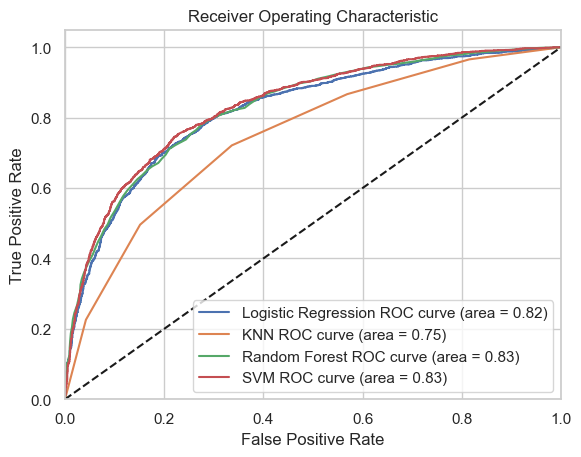

In [438]:
# Plot all ROC curves in one plot
plt.figure()
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [442]:
import joblib
joblib.dump(models,"models.pkl")

['models.pkl']